In [1]:
from mongo import MongoDBManager
import os
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import re

# Retrieving data

In [2]:
load_dotenv()
uri = os.getenv('MONGODB_URI')
database_name = os.getenv('DATABASE_NAME')
mongo_manager = MongoDBManager(uri, database_name)

In [3]:
documents = mongo_manager.read_all_documents_in_collection_with_GridFS()

3


# Formating Datas

In [5]:
data_formated = []
for country in cleaned_data.keys():
   for profession in documents[country].keys():
       for language in documents[country][profession].keys():
            for data in documents[country][profession][language]:
                data['country'] = country
                data['profession'] = profession
                data['language'] = language
                data_formated.append(data)
               
len(data_formated)

26075

# Visualizing Data

In [6]:
df = pd.DataFrame(data_formated)
df.describe()

,positionTitle,companyName,location,salaryInfoAndJobType,description,datePosted,salary,jobType,shiftAndSchedule,jobBenefits,updatedDate,country,profession,language
count,26075,26075,26075,26075,26075,25395,26075,26075,26075,26075,26075,26075,26075,26075
unique,9962,6373,5609,4436,9118,46,2566,276,533,2678,10,3,12,2
top,Office Administrator,Accenture Federal Services,"Montréal, QC",Full-time,,,,[],,[],2024-09-13,Canada,"Accompagnatrice, accompagnateur, musicienne ou...",en
freq,450,244,734,3046,227,3046,11825,6174,17969,12457,9015,12199,5293,19949


In [15]:
df = df.applymap(lambda x: tuple(x) if isinstance(x, list) else x)
df = df.drop_duplicates()
df = df[((df['positionTitle'] != '') & (df['description'] != '')) | df['positionTitle'] != '']
# df['jobType'] = df.apply(
#     lambda x: tuple(list(x['jobType']) + list(x['salary'])) 
#     if not re.search(r'\d+', str(x['salary'])) 
#     else x['jobType'], 
#     axis=1
# )
# df['salary'] = df['salary'].map(
#     lambda x: '' 
#     if not re.search(r'\d+', str(x))
#     else x
# )

# df['salary'] = df.apply(
#     lambda x: str(x['salary']+"-"+str(list(x['jobType'])[0]) )
#     if not re.search(r'\d+', str(list(x['jobType'])[0])) 
#     else str(x['salary']), 
#     axis=1
# )
# df['jobType'] = df['jobType'].map(
#     lambda x: '' 
#     if not re.search(r'\d+', str(x))
#     else x
# )

df.describe()

C:\Users\PC\AppData\Local\Temp\ipykernel_13112\3452898372.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: tuple(x) if isinstance(x, list) else x)


,positionTitle,companyName,location,salaryInfoAndJobType,description,datePosted,salary,jobType,shiftAndSchedule,jobBenefits,updatedDate,country,profession,language
count,2510,2510,2510,2510,2510,2468,2510,2510,2510,2510,2510,2510,2510,2510
unique,1365,1178,1246,909,1486,31,454,108,242,546,1,3,3,2
top,Medical Assistant,PHSA,"Roberval, QC",Full-time,POSTE AVEC BEAUCOUP DE DÉPLACEMENT\n\nSERVICES...,2024-08-10,,"(Full-time,)",,(),2024-09-09,US,"Accompagnatrice, accompagnateur, musicienne ou...",en
freq,41,77,44,202,44,699,1165,293,1611,1106,2510,1402,2392,1802


<Axes: xlabel='location'>

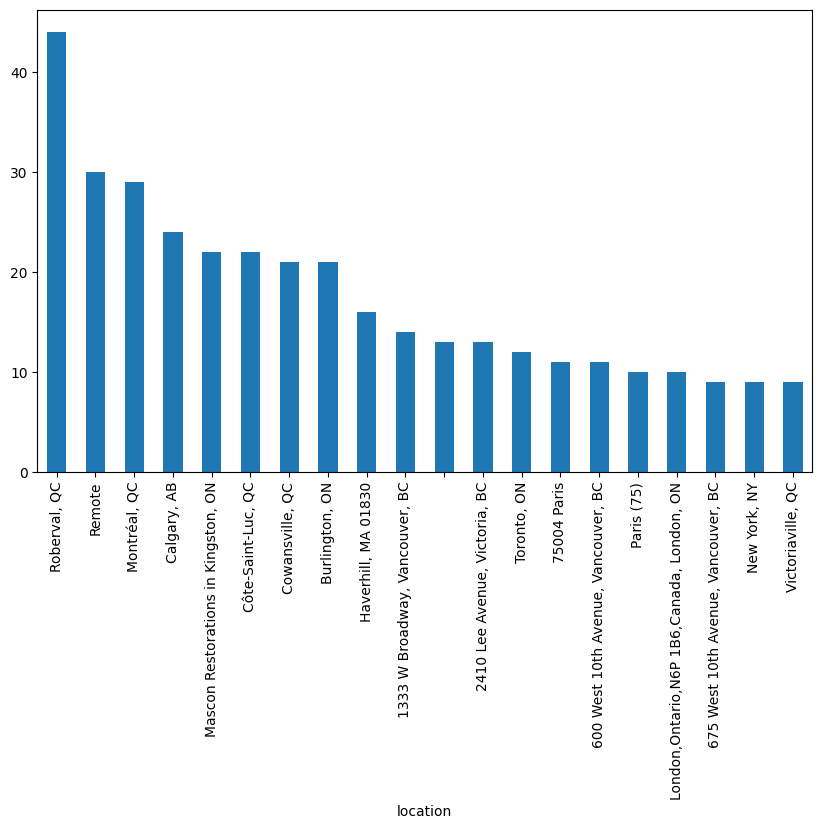

In [16]:
plt.figure(figsize=(10, 6))
df['location'].value_counts()[:20].plot(kind='bar')

<Axes: xlabel='jobType,salary'>

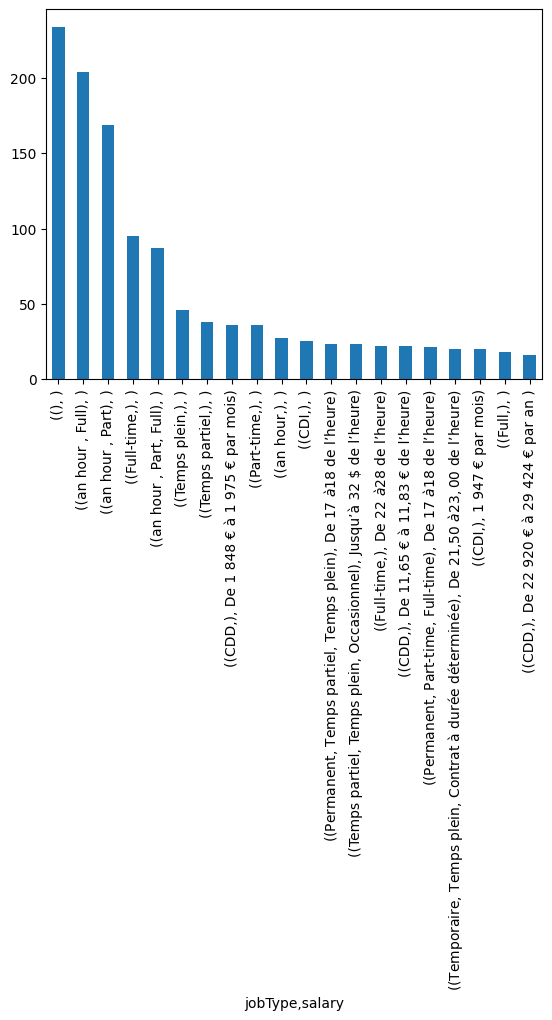

In [17]:
df_counts = df[['jobType','salary']].value_counts()[:20].plot(kind='bar')
# df_counts.plot(kind='scatter', x='positionTitle', y='location', s=df_counts['count'] * 10)
# plt.xticks(rotation=45)
# plt.show()
df_counts

<Axes: xlabel='salary'>

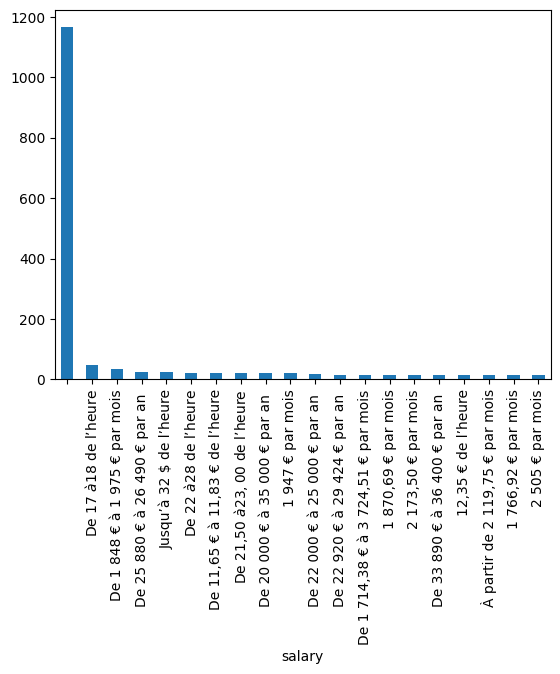

In [18]:
df['salary'] = df.apply(
    lambda x: "" 
    if not re.search(r'\d+', str(x['salary'])) 
    else x['salary'], 
    axis=1
)

# Afficher les 10 valeurs les plus fréquentes dans salary
df['salary'].value_counts()[:20].plot(kind='bar')

In [ ]:
df_value_count=df[['positionTitle','companyName','location','description',"datePosted"]]
df_value_count

,positionTitle,companyName,location,description,datePosted
0,,,,,
1,"Regional Vice President of Sales, North America",NetAlly,Remote,DUTIES & RESPONSIBILITIES\n\nNetAlly is seekin...,2024-08-05
2,"Revenue Operations Manager, Partner Ops","Guideline, Inc.",Remote,Guideline is looking for a Revenue Operations ...,2024-08-08
3,Revenue Operations Manager,Liatrio,Remote,About Liatrio\nLiatrio is a boutique consultin...,2024-08-07
4,Revenue Operations Manager (Remote),Liatrio,Remote,About Liatrio\nLiatrio is a boutique consultin...,2024-08-07
...,...,...,...,...,...
49767,Service Technician,"Amazon Canada Fulfillment Services, ULC - B85","Toronto, ON",Currently enrolled in a bachelor’s degree prog...,2024-08-23
49768,Commercial Services Operations Manager - Tsaww...,"Amazon Canada Fulfillment Services, ULC - B85","Toronto, ON",Currently enrolled in a bachelor’s degree prog...,2024-08-20
49769,Material Coordinator,"Amazon Canada Fulfillment Services, ULC - B85","Toronto, ON",Currently enrolled in a bachelor’s degree prog...,2024-08-23
49770,Shipping Manager,"Amazon Canada Fulfillment Services, ULC - B85","Toronto, ON",Currently enrolled in a bachelor’s degree prog...,2024-08-23
